In [114]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import sympy as sp

In [115]:
# This example is from chapter 7.4 in Lay's Linear Algebra Text
A = np.array([[4,11,14],[8,7,-2]])

In [116]:
# Make data
u = np.array([np.linspace(0, 2 * np.pi, 1000)])
v = np.linspace(0, np.pi, 1000)
X = 1 * np.outer(np.cos(u), np.sin(v))
Y = 1 * np.outer(np.sin(u), np.sin(v))
Z = 1 * np.outer(np.ones(np.size(u)), np.cos(v))

In [117]:
sphere_array = np.array([X.reshape(1000**2),Y.reshape(1000**2),Z.reshape(1000**2)])
image_array = A@sphere_array


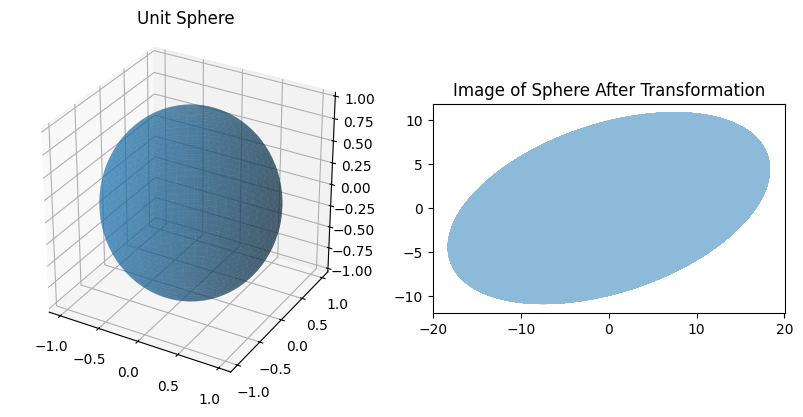

In [118]:
figure1 = plt.figure(figsize=(10,5))

# add axes to the figure
axis11 = figure1.add_subplot(121,projection='3d')
axis12 = figure1.add_subplot(122)

# set aspect ratios
axis11.set_aspect('equal')
axis12.set_aspect('equal')

# set titles
axis11.set_title("Unit Sphere")
axis12.set_title("Image of Sphere After Transformation")

# add images to the axes
axis11.plot_surface(X,Y,Z,alpha=0.5)
axis12.plot(image_array[0],image_array[1],alpha=0.5);

In [119]:
# calculate A^tA, a symmetric matrix
B = A.transpose()@A
B_eigvals, B_eigvecs = la.eig(B)

In [120]:
image_vecs = [None]*3
for i in range(3):
    image_vecs[i] = np.array([A@B_eigvecs[i]]).transpose()
    print(A@B_eigvecs[i])

[-18.  -6.]
[-4.99600361e-15  3.33066907e-16]
[ 3. -9.]


In [121]:
image_data = image_vecs[0]@np.cos(u)+image_vecs[2]@np.sin(u)

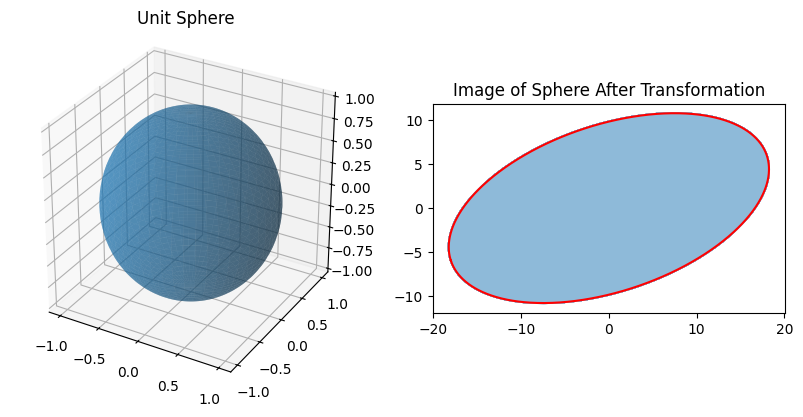

In [122]:
axis12.plot(image_data[0],image_data[1],'r');
figure1

In [123]:
figure1.savefig("projection_before_and_after.png")

In [124]:
sp.Matrix(A)

Matrix([
[4, 11, 14],
[8,  7, -2]])

In [125]:
sp.latex(sp.Matrix(A))

'\\left[\\begin{matrix}4 & 11 & 14\\\\8 & 7 & -2\\end{matrix}\\right]'

In [126]:
def matrix_to_latex(M):
    return sp.latex(sp.Matrix(M))

In [127]:
print(matrix_to_latex(A))

\left[\begin{matrix}4 & 11 & 14\\8 & 7 & -2\end{matrix}\right]


In [128]:
print(matrix_to_latex(B))

\left[\begin{matrix}80 & 100 & 40\\100 & 170 & 140\\40 & 140 & 200\end{matrix}\right]


In [129]:
B_eigvecs.round(2)

array([[-0.33, -0.67, -0.67],
       [-0.67,  0.67, -0.33],
       [-0.67, -0.33,  0.67]])

In [130]:
B_eigvals

array([ 3.60000000e+02, -3.71123759e-15,  9.00000000e+01])

In [131]:
A@B_eigvecs

array([[-1.80000000e+01, -2.66453526e-15,  3.00000000e+00],
       [-6.00000000e+00,  0.00000000e+00, -9.00000000e+00]])

In [132]:
B_eigvecs

array([[-0.33333333, -0.66666667, -0.66666667],
       [-0.66666667,  0.66666667, -0.33333333],
       [-0.66666667, -0.33333333,  0.66666667]])

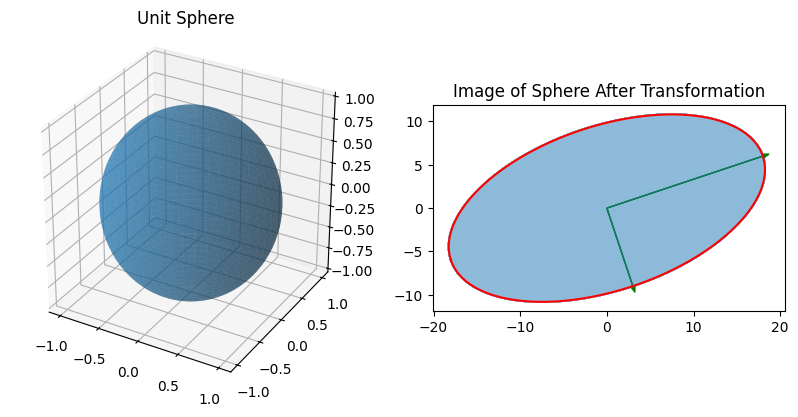

In [133]:
axis12.arrow(0,0,18,6,color='g',head_width=0.5)
axis12.arrow(0,0,3,-9,color='g',head_width=0.5)
figure1

In [134]:
figure1.savefig("projection_with_vectors.png")

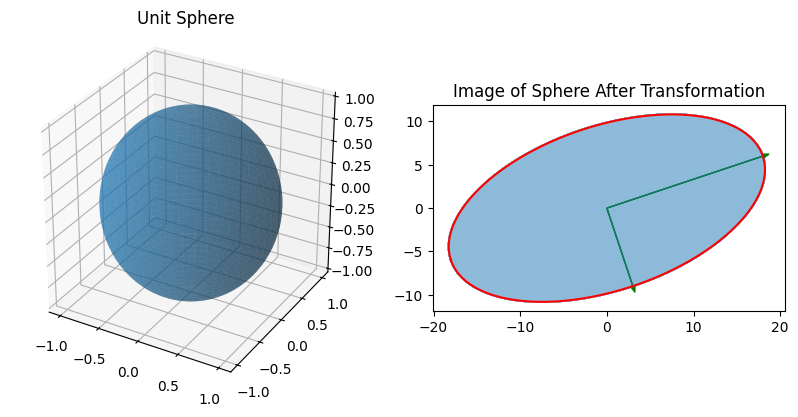

In [135]:
figure1

In [136]:
idx  = B_eigvals.argsort()[::-1]
idx

array([0, 2, 1])

In [137]:
B_eigvals = B_eigvals[idx]
B_eigvecs = B_eigvecs[:,idx]
B_eigvecs

array([[-0.33333333, -0.66666667, -0.66666667],
       [-0.66666667, -0.33333333,  0.66666667],
       [-0.66666667,  0.66666667, -0.33333333]])

In [138]:
def normalize(M):
    rows,cols = M.shape
    for i in range(cols):
        col_norm = la.norm(M[:,i])
        if col_norm != 0:
            # if M[0,i]<0:
            #     M[:,i] = -1*M[:,i]
            M[:,i] = M[:,i]/col_norm
        # else:
        #     M = np.delete(M,i,1)
    return M

In [139]:
np.sqrt(B_eigvals.round(2))

array([18.97366596,  9.48683298, -0.        ])

In [180]:
V = B_eigvecs
D = np.sqrt(np.diag(B_eigvals).round(10))
U = (A@B_eigvecs).round(10)
U = normalize(U).round(10)

In [181]:
U

array([[-0.9486833 ,  0.31622777, -0.        ],
       [-0.31622777, -0.9486833 ,  0.        ]])

In [182]:
D

array([[18.97366596,  0.        ,  0.        ],
       [ 0.        ,  9.48683298,  0.        ],
       [ 0.        ,  0.        , -0.        ]])

In [183]:
V.transpose()

array([[-0.33333333, -0.66666667, -0.66666667],
       [-0.66666667, -0.33333333,  0.66666667],
       [-0.66666667,  0.66666667, -0.33333333]])

In [184]:
U@D@V.transpose()

array([[ 4., 11., 14.],
       [ 8.,  7., -2.]])

In [161]:
A

array([[ 4, 11, 14],
       [ 8,  7, -2]])

In [186]:
U2,D2,V2 = la.svd(A)

In [187]:
U2

array([[-0.9486833 , -0.31622777],
       [-0.31622777,  0.9486833 ]])

In [188]:
D2

array([18.97366596,  9.48683298])

In [194]:
V2.transpose()

array([[-0.33333333,  0.66666667, -0.66666667],
       [-0.66666667,  0.33333333,  0.66666667],
       [-0.66666667, -0.66666667, -0.33333333]])

In [196]:
B_eigvecs

array([[-0.33333333, -0.66666667, -0.66666667],
       [-0.66666667, -0.33333333,  0.66666667],
       [-0.66666667,  0.66666667, -0.33333333]])

In [197]:
U

array([[-0.9486833 ,  0.31622777, -0.        ],
       [-0.31622777, -0.9486833 ,  0.        ]])

In [280]:
C = np.array([[0,1],[1,1],[0,1]])
C_prod = np.matmul(C.transpose(),C)
c_eigval,c_eigvecs = la.eig(C_prod)
print(c_eigvecs,"\n\n",c_eigval)

[[-0.92387953 -0.38268343]
 [ 0.38268343 -0.92387953]] 

 [0.58578644 3.41421356]


In [281]:
idx = c_eigval.argsort()[::-1]
c_eigval = c_eigval[idx]
c_eigvecs = c_eigvecs[:,idx]

In [284]:
c_eigvecs = c_eigvecs*-1

In [300]:
U = normalize(C@c_eigvecs)
D = np.sqrt(np.diag(c_eigval))
Vt = c_eigvecs.transpose()

In [302]:
(U@D@Vt).round(3)

array([[-0.,  1.],
       [ 1.,  1.],
       [-0.,  1.]])

In [295]:
C

array([[0, 1],
       [1, 1],
       [0, 1]])

In [303]:
D

array([[1.84775907, 0.        ],
       [0.        , 0.76536686]])

In [304]:
la.svd(C)[0]

array([[ 0.5       , -0.5       , -0.70710678],
       [ 0.70710678,  0.70710678,  0.        ],
       [ 0.5       , -0.5       ,  0.70710678]])

In [305]:
la.svd(C)[2]

array([[ 0.38268343,  0.92387953],
       [ 0.92387953, -0.38268343]])

In [306]:
U

array([[ 0.5       , -0.5       ],
       [ 0.70710678,  0.70710678],
       [ 0.5       , -0.5       ]])

In [307]:
la.svd(C)[1]

array([1.84775907, 0.76536686])

In [308]:
C

array([[0, 1],
       [1, 1],
       [0, 1]])

In [317]:
x_vals = np.cos(u)
y_vals = np.sin(u)
circle = np.array([x_vals[0],y_vals[0]])
circle.shape

(2, 1000)

In [318]:
circle_image = np.matmul(C,circle)
circle_image.shape

(3, 1000)

(1000,) (1000,)


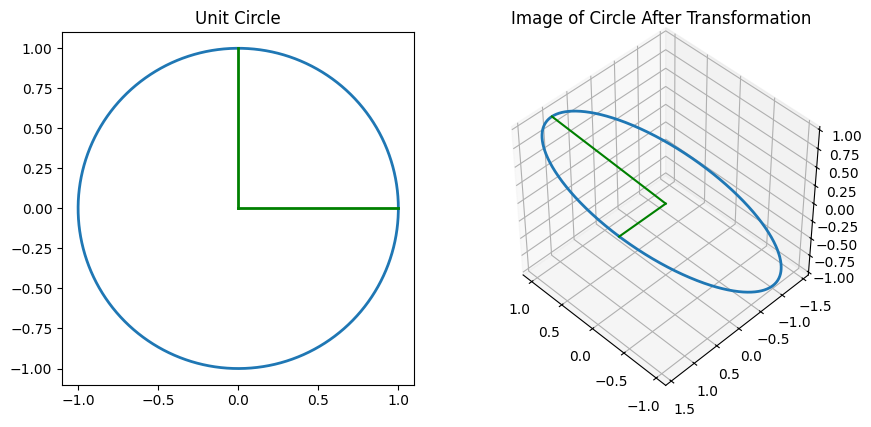

In [373]:
figure2 = plt.figure(figsize=(10,6))
# add axes to the figure
axis211 = figure2.add_subplot(121)
axis212 = figure2.add_subplot(122,projection='3d')

# set aspect ratios
axis211.set_aspect('equal')
axis212.set_aspect('equal')

# set titles
axis211.set_title("Unit Circle")
axis212.set_title("Image of Circle After Transformation")

# add images to the axes
axis211.plot(circle[0],circle[1],linewidth=2)
axis212.plot(circle_image[0],circle_image[1],circle_image[2],linewidth=2)

# add vectors
X = np.zeros(1000)
Y = (u/(2*np.pi))[0]
print(X.shape,Y.shape)
axis211.plot(X,Y,'g',linewidth=2)
axis211.plot(Y,X,'g',linewidth=2)
axis212.plot(0,u/(2*np.pi),0,color='g')
axis212.plot(u/(2*np.pi),u/(2*np.pi),u/(2*np.pi),color='g')
# axis212.plot(cross_coef[0]*u/(2*np.pi),0,cross_coef[2]*u/(2*np.pi),color='r')


# adjust the viewing angle
axis212.view_init(elev=45, azim=135, roll=0);

In [374]:
figure2.savefig("circle_map.png")

In [333]:
C@[0,1]

array([1, 1, 1])

In [355]:
U

array([[ 0.5       , -0.5       ],
       [ 0.70710678,  0.70710678],
       [ 0.5       , -0.5       ]])

In [365]:
cross_coef = la.cross(U[:,0],U[:,1])

In [361]:
U[0].shape

(2,)